### Installing requirements

The next cell will install/update all required packages for this project:

In [1]:
#to reflect changes made in modules
%load_ext autoreload
%autoreload 2

In [2]:
!pip -q install --upgrade -r ../requirements.txt
print("Packages successfully installed and up-to-date.")

Packages successfully installed and up-to-date.


### Setting API keys and creating class instances

**YT_KEY** = your YouTube API Key.<br>
**DB_KEY** remain unchanged.

In [50]:
DB_KEY =  
YT_KEY =

In [51]:
import os, sys
sys.path.append(os.path.join(sys.path[0], '../'))

from wildbook_social import YouTube, Database

db = Database(DB_KEY, 'youtube')
yt = YouTube(YT_KEY, db)

### Specify query term and how many videos to query

In [52]:
#uncomment the appropriate query and saveTo term for the species you wish to retrieve results from

query = "Humpback Whales -octonauts, -my top 10, -facts, -learning, -kids, -draw, -art, -cartoon, -toy, -songs, -album, -games"
saveTo = "humpback whales"

# query = 'whale sharks'# -octonauts, -top 10, -basking, -megalodon, -kids, -cartoon, -feed and grow fish, -pungence, -DIY, -toys, -draw, -gameplay, -hungry shark world, -manta ray, -white shark, -blue'
# saveTo = "new whale sharks test"

# query = 'iberian lynx |lince ibérico -Apex, -LRH, -Playoffs, -Game, -Draw, -Floor, -Music, -Sport, -Puzzle, -MMA, -felt, -kids, -eurasian, -documentary'
# saveTo = 'iberian lynx'

# query = 'giraffe -diy, -top 10, -kids, -children, -peppa pig, -compilation'#'reticulated giraffe'
# saveTo = 'Reticulated Giraffe'

#use this one
# query = "zebra|zebras|grevys zebra -warhol, -diy, -DIY, -tutorial, -V3, -V2, -facts"
# saveTo = 'grevys zebra'

# query = 'grevys zebra -song, -octonauts, -reviews, -campaign, -facts, -kids, -tycoon, -green, -cartoon, -trust, -pronunciation, -Andy Warhol'
# saveTo = 'grevys zebra'

# query = "zebra|zebras|plains zebra|common zebra, -warhol, -diy, -DIY, -tutorial, -V3, -V2, -facts, -wildebeests,-lions, -migration"
# saveTo = 'plains zebras'

#can change this value for user preferences (depending on how many results needed)
howManyVideosToQuery = 5 #900

### Querying and saving

The next cell will query the videos from YouTube and automatically save them into MongoDB:

In [53]:
res = yt.search(q=query, limit=howManyVideosToQuery, saveTo=saveTo)

Working with page 1
Done!


### Doing statistics

The next cell will run script to get unchecked videos from database one by one for manual checking:

number of documents with UTC strings: 
0


number of documents with datetime objects: 
771
1: Humpback Whale Feeding Congregation in Monterey Bay!


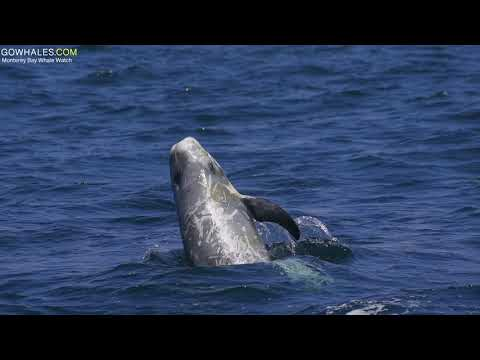

Relevant (y/n): y
Wild (y/n): y
Is there a location? (y/n): y
Enter location (city,country): monterey bay
Response saved! Location : monterey bay.

Response saved! Relevant and Wild.

No more items to proceed.


In [54]:
forQuery = saveTo #query the same collection you are saving data to

howManyVideosToGoOver = 1 #change this number to number desired post-testing

db.convertToUTC(saveTo) #uncomment this after running it across each collection
db.doStatistics(forQuery, howManyVideosToGoOver)

In [8]:
#db.getLocations("whale sharks test", howManyVideosToGoOver)

With the next command you can see the statistics for passed collection (query term) as a parameter:

In [9]:
# db.showStatistics(forQuery) #FIXME: need to update how we deal with lists of dates and such in other methods

In [10]:
# listOfDates = db.gatherDates(saveTo, YYYY = 2019, MM = 6, DD = 1) # entire list of dates of all posts within time fram
# postsPerWeekDict = db.postsPerWeek(YYYY = 2019, MM = 6, DD = 1) # dict = {week date : count of posts}
# smas = db.movingAveragePosts(3) #simple moving average data points

# print('\n')
# print(listOfDates)
# print('\n')
# print(postsPerWeekDict)
# # for key in postsPerWeekDict.keys():
# #     print(key)

# print('\n')
# print(smas)
# print('\n')
# for item in smas:
#     print(item)

In [11]:
# uncomment the appropriate csvName to save all your filtered result locations in a csv folder

# csvName = 'humpbackWhales'

# csvName = 'whaleSharks'
# csvName = 'new whale sharks'

# csvName = 'iberianLynx'

# csvName = 'grevysZebra'

# csvName = 'retGiraffe'

# csvName = 'plainsZebra'

# db.heatmap(saveTo, csvName)




In [12]:
# get user countries
# collection = saveTo + ' wild'
# listOfVideoIDs = db.getUserCountriesIDs(collection)
# # print(listOfVideoIDs)
# csvFile = 'humpbackWhalesUsers'
# yt.channelToCountry(listOfVideoIDs, saveTo, csvFile)


In [13]:
# https://www.google.com/maps/d/u/0/ 

In [14]:
#retrieve all wild documents from current database('saveTo') and store in new db consisting only of wild documents
# db.relevantDocuments(saveTo)

#for the new whale sharks test collection (to merge both wild collections)
# saveTo = 'whale sharks'
# db.relevantDocuments(saveTo)

In [15]:
db.close()